# Aircraft Engine Classifiation Project
## Background
ipsum loret

## Import Dependancies and Data

In [47]:
import pandas as pd
import numpy as np
import requests
import zipfile
import seaborn as sns

In [15]:
#constants definition
url ='https://ti.arc.nasa.gov/c/6/'
zippedfile = 'CMAPSSData.zip'
train_header = ["id", "cycle", "set1", "set2", "set3", "s1", "s2", "s3", "s4", "s5", "s6", "s7", "s8", "s9",
                "s10", "s11", "s12", "s13", "s14", "s15", "s16", "s17", "s18", "s19", "s20", "s21"]

In [16]:
#Download and extract the raw data
r = requests.get(url)
open(zipppedfile,'wb').write(r.content)
zipfile.ZipFile(zippedfile, 'r').extractall()

In [44]:
train_data = pd.read_csv('train_FD001.txt', delim_whitespace=True, header = None, names = train_header )


In [45]:
train_data.head()
train_data.shape

(20631, 26)

## Exploratory Data Analysis



In [12]:
train_data.isna().sum().sum()

0

In [26]:
settings = train_data.loc[:, 'set1':'set3']
settings.describe()

set1          set2     set3
count  20631.000000  20631.000000  20631.0
mean      -0.000009      0.000002    100.0
std        0.002187      0.000293      0.0
min       -0.008700     -0.000600    100.0
25%       -0.001500     -0.000200    100.0
50%        0.000000      0.000000    100.0
75%        0.001500      0.000300    100.0
max        0.008700      0.000600    100.0

In [29]:
sensors = train_data.loc[:, 's1':'s10']
sensors.describe()

s1            s2            s3            s4            s5  \
count  2.063100e+04  20631.000000  20631.000000  20631.000000  2.063100e+04   
mean   5.186700e+02    642.680934   1590.523119   1408.933782  1.462000e+01   
std    6.537152e-11      0.500053      6.131150      9.000605  3.394700e-12   
min    5.186700e+02    641.210000   1571.040000   1382.250000  1.462000e+01   
25%    5.186700e+02    642.325000   1586.260000   1402.360000  1.462000e+01   
50%    5.186700e+02    642.640000   1590.100000   1408.040000  1.462000e+01   
75%    5.186700e+02    643.000000   1594.380000   1414.555000  1.462000e+01   
max    5.186700e+02    644.530000   1616.910000   1441.490000  1.462000e+01   

                 s6            s7            s8            s9           s10  
count  20631.000000  20631.000000  20631.000000  20631.000000  2.063100e+04  
mean      21.609803    553.367711   2388.096652   9065.242941  1.300000e+00  
std        0.001389      0.885092      0.070985     22.082880  4.660829e-13  
min       21.600000    549.850000   2387.900000   9021.730000  1.300000e+00  
25%       21.610000    552.810000   2388.050000   9053.100000  1.300000e+00  
50%       21.610000    553.440000   2388.090000   9060.660000  1.300000e+00  
75%       21.610000    554.010000   2388.140000   9069.420000  1.300000e+00  
max       21.610000    556.060000   2388.560000   9244.590000  1.300000e+00

In [30]:
sensors = train_data.loc[:, 's11':'s21']
sensors.describe()

s11           s12           s13           s14           s15  \
count  20631.000000  20631.000000  20631.000000  20631.000000  20631.000000   
mean      47.541168    521.413470   2388.096152   8143.752722      8.442146   
std        0.267087      0.737553      0.071919     19.076176      0.037505   
min       46.850000    518.690000   2387.880000   8099.940000      8.324900   
25%       47.350000    520.960000   2388.040000   8133.245000      8.414900   
50%       47.510000    521.480000   2388.090000   8140.540000      8.438900   
75%       47.700000    521.950000   2388.140000   8148.310000      8.465600   
max       48.530000    523.380000   2388.560000   8293.720000      8.584800   

                s16           s17      s18      s19           s20  \
count  2.063100e+04  20631.000000  20631.0  20631.0  20631.000000   
mean   3.000000e-02    393.210654   2388.0    100.0     38.816271   
std    1.556432e-14      1.548763      0.0      0.0      0.180746   
min    3.000000e-02    388.000000   2388.0    100.0     38.140000   
25%    3.000000e-02    392.000000   2388.0    100.0     38.700000   
50%    3.000000e-02    393.000000   2388.0    100.0     38.830000   
75%    3.000000e-02    394.000000   2388.0    100.0     38.950000   
max    3.000000e-02    400.000000   2388.0    100.0     39.430000   

                s21  
count  20631.000000  
mean      23.289705  
std        0.108251  
min       22.894200  
25%       23.221800  
50%       23.297900  
75%       23.366800  
max       23.618400

In [ ]:
s1, s5, s6, s10, s16, s18, s19 sensor values also have no value, so lets take them out of the document.

In [46]:
train_data = train_data.loc[:, ['id','cycle', 'set1','set2','s2','s3','s4','s7','s8','s9','s11','s12','s13','s14','s15', 's17','s20','s21']]
train_data.shape

(20631, 18)

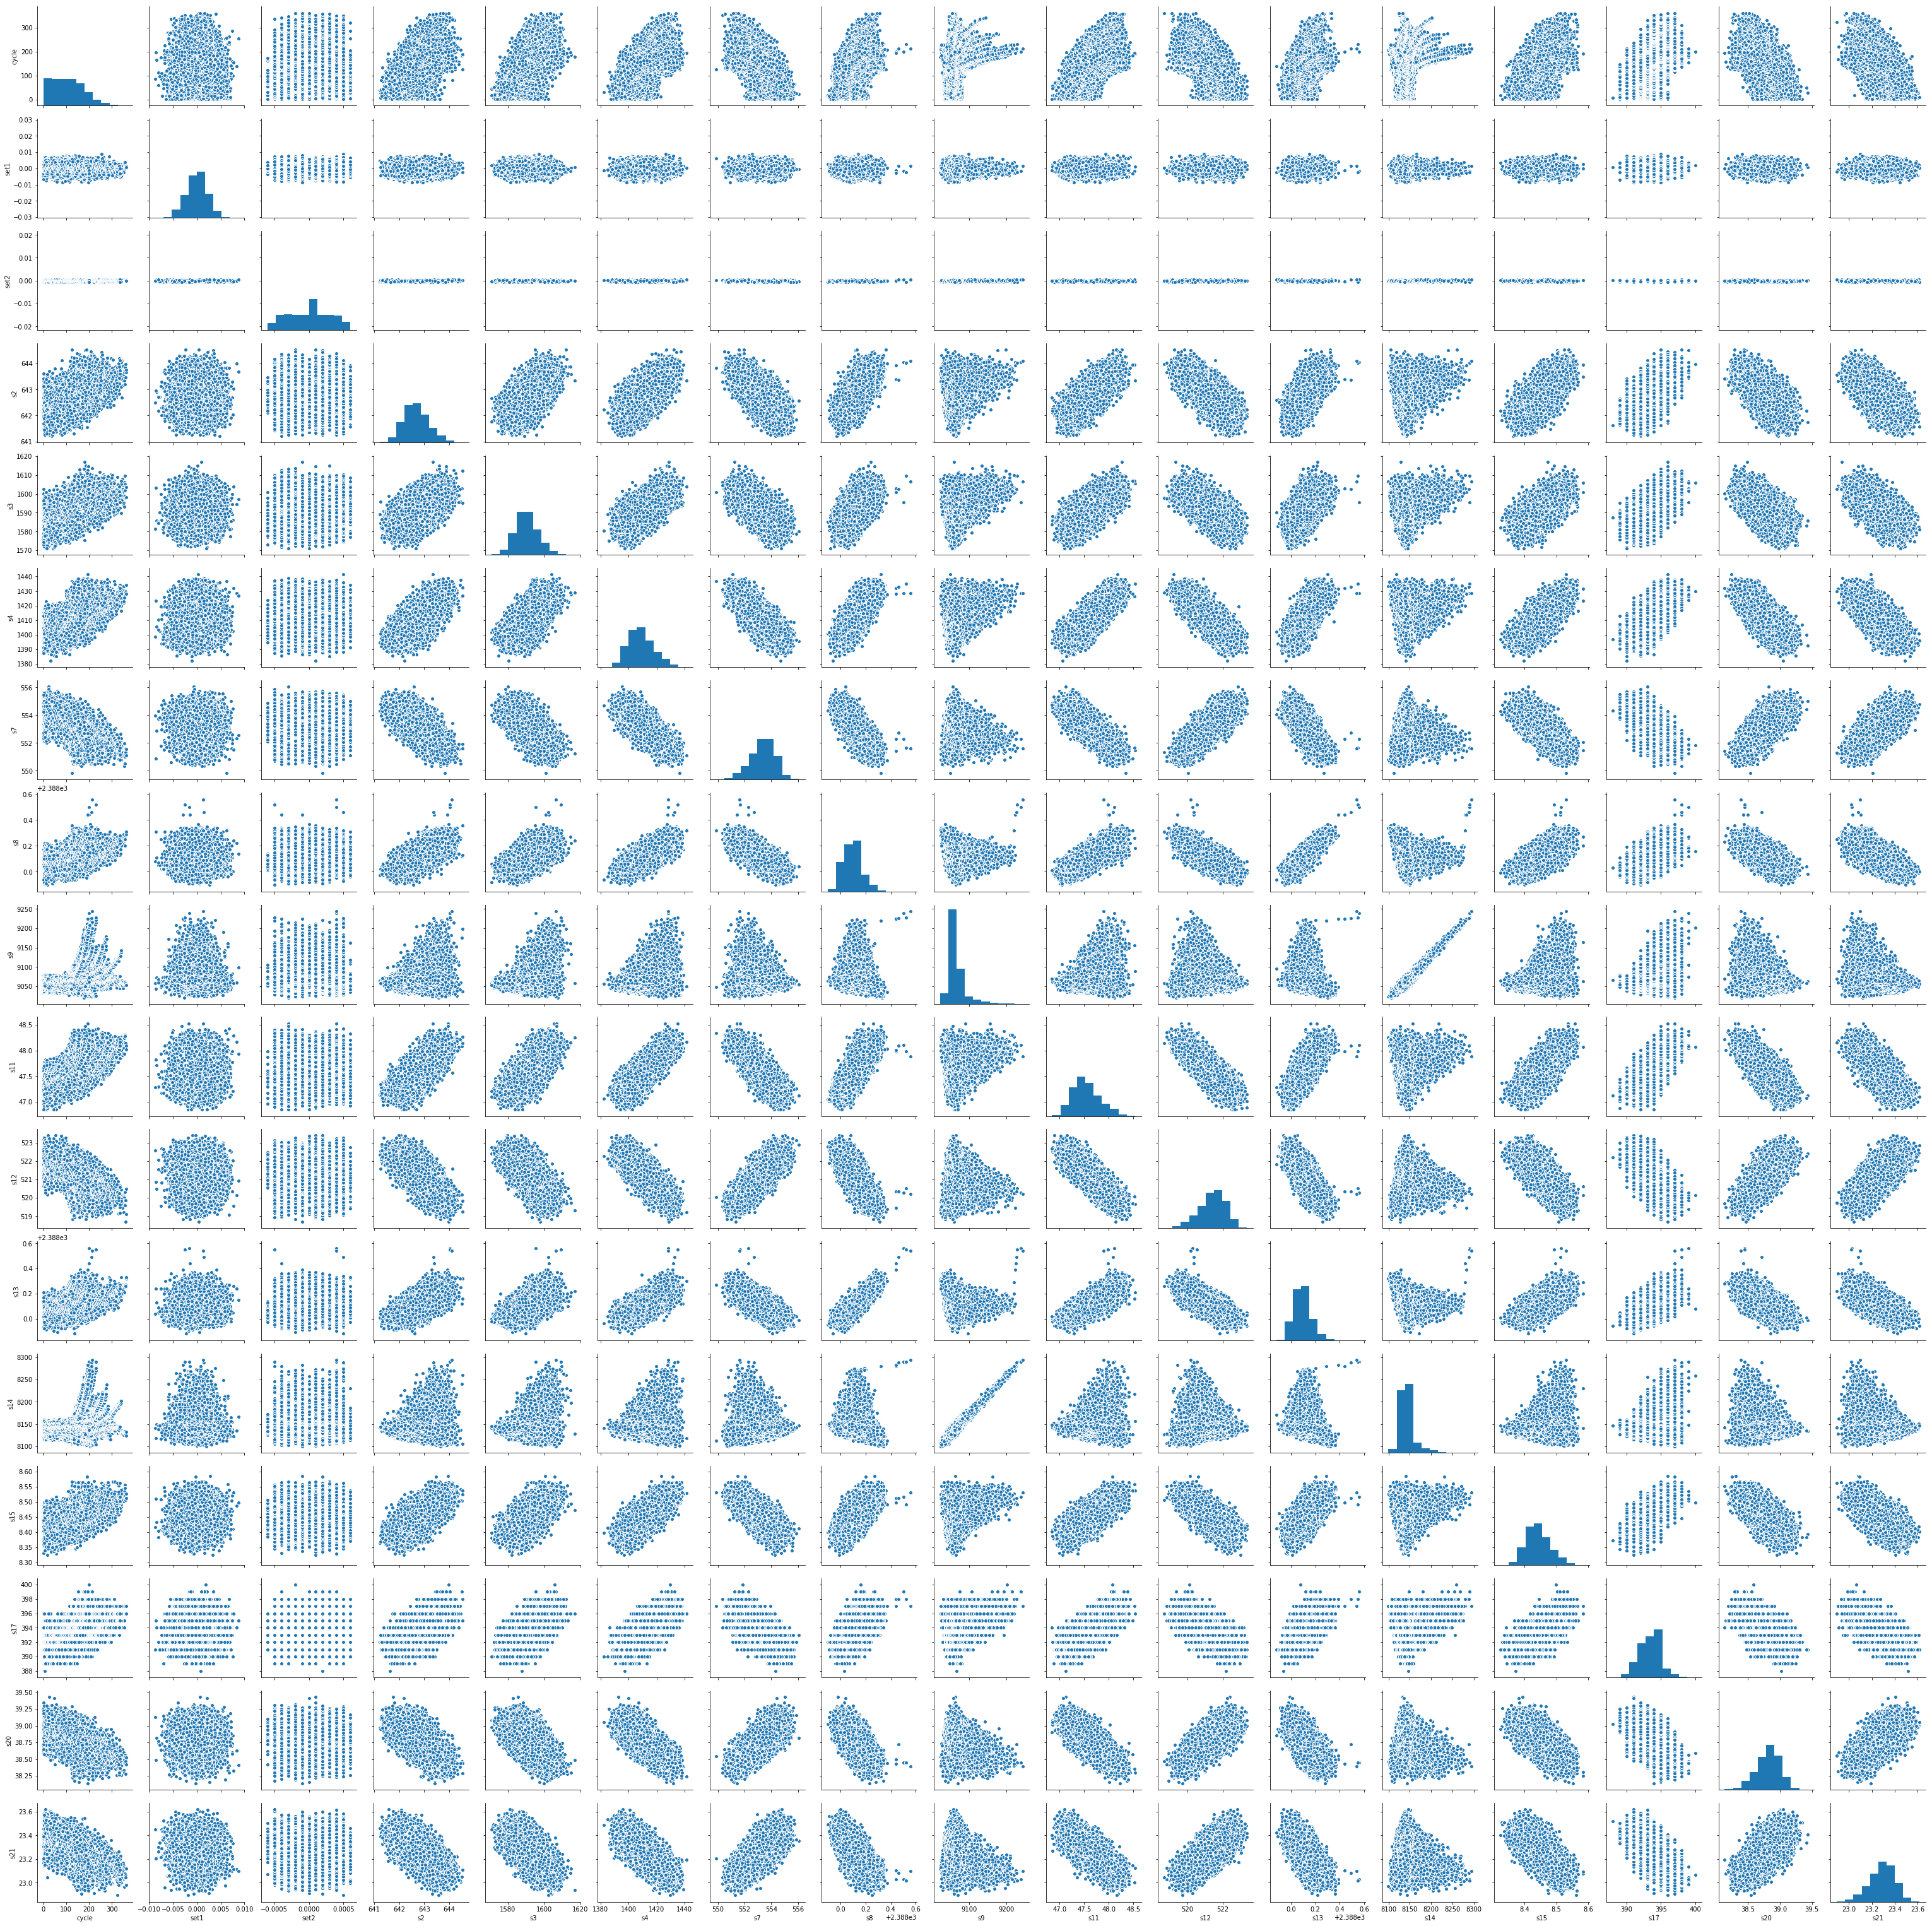

In [50]:
sns.pairplot(train_data.iloc[:,1:])

### There are multiple columns that appear to have correllations
We can look at those more closely.  
The first row(column) is the number of cycles.  Mulltiple variables seem to drift as time increases.  This may indicate some degredation is taking place.
The next two rows (columns) are the settings.  There seems to be very little correllation between the settings and the sensors.
There are a number of correllations between the sensor data.
    Rows 9(s8) and 13(s13) have a very strong correllation.
    There are less significant correllations between S1 and 